This notebook contains code to train a linear classifier on MNIST. The principal changes from the previous notebook 01 are:

We have switched from regression to classification.

We are using a different loss function. Instead of using squared error, we will now use cross-entropy.

We are using a new dataset. MNIST contains 28x28 pixel handwritten digits. Earlier we have used our own random data

In [76]:
import warnings 
warnings.filterwarnings("ignore")
import tensorflow as tf

In [77]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data

import numpy as np

import pylab
%matplotlib inline

In [78]:
tf.reset_default_graph()
sees= tf.Session()



In [79]:
#import the mnist dataset
# It will be downloaded to '/tmp/data' if you don't already have a local copy.

mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [80]:
print ("Train, validation, test: %d, %d, %d" %  (len(mnist.train.images), len(mnist.validation.images), len(mnist.test.images)))

Train, validation, test: 55000, 5000, 10000


In [81]:
print (mnist.train.labels[1])
print (mnist.train.labels[2])
print (mnist.train.labels[3])
print (mnist.train.labels[4])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
print (np.argmax(mnist.train.labels[4]))

1


In [83]:
print (len(mnist.train.images[5]))

784


Text(0.5, 1.0, 'Label: 1')

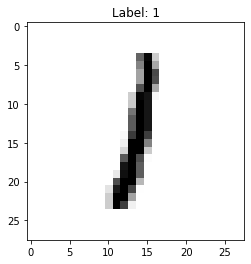

In [84]:
pylab.imshow(mnist.train.images[4].reshape((28,28)), cmap=pylab.cm.gray_r) 
pylab.title('Label: %d' % np.argmax(mnist.train.labels[4]))

In [66]:

NUM_CLASSES = 10
NUM_PIXELS = 28 * 28
TRAIN_STEPS = 2000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

In [87]:
#Define inputs
images = tf.placeholder(dtype=tf.float32, shape=[None, NUM_PIXELS])
print(images.shape)
labels = tf.placeholder(dtype=tf.float32, shape=[None, NUM_CLASSES])
print(labels.shape)

(?, 784)
(?, 10)


In [90]:
#Define Model
with tf.name_scope("model"):
    W = tf.Variable(tf.truncated_normal([NUM_PIXELS, NUM_CLASSES]))
    print(W.shape)
    b = tf.Variable(tf.zeros([NUM_CLASSES]))
    print(b.shape)
    print(images.shape)
    y = tf.matmul(images, W) + b

(784, 10)
(10,)
(?, 784)


In [91]:
# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=labels))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [92]:
# Initialize variables after the model is defined
sees.run(tf.global_variables_initializer())

In [98]:
# Train the model
for i in range(1):
    batch_images, batch_labels = mnist.train.next_batch(BATCH_SIZE)
    print(len(batch_images))
    print(batch_images.shape)
    print(batch_labels.shape)
    sees.run(train_step, feed_dict={images: batch_images, labels: batch_labels})

100
(100, 784)
(100, 10)


In [73]:
# Evaluate the trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                  
print("Accuracy %f" % sees.run(accuracy, feed_dict={images: mnist.test.images, 
                                                    labels: mnist.test.labels}))

Accuracy 0.895100


Predicted: 6, actual: 6


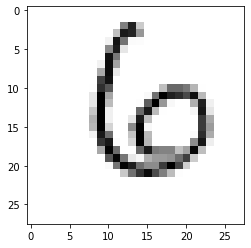

In [101]:
prediction = tf.argmax(y,1)

def predict(i):
    image = mnist.test.images[i]
    actual_label = np.argmax(mnist.test.labels[i])
    predicted_label = sees.run(prediction, feed_dict={images: [image]})
    return predicted_label, actual_label

i = 100
predicted, actual = predict(i)
print ("Predicted: %d, actual: %d" % (predicted, actual))
pylab.imshow(mnist.test.images[i].reshape((28,28)), cmap=pylab.cm.gray_r)